## Advancing the state of an uncontrolled (implying the rotors aren't spinning) 2D drone. The drone can move in 2-dimensions (horixontal Y-axis and vertical Z-axis). The two rotors are placed side by side, so that it can rotate about the X-axis (into the plane). We avoid any reactive moment induced.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class Drone2D:
    
    def __init__(self,k_f=0.1,i=0.1,m=1.0,l=0.15):
        
        self.k_f = k_f
        self.i = i # moment of inertia about the X-axis
        self.m = m # mass of the drone
        self.l = l # distance of the rotors from the center of mass
        
        self.omega1 = 0.0
        self.omega2 = 0.0
        
        # State vector
        self.X = np.array([0.0,0.0,0.0,0.0,0.0,0.0]) # y,z,phi,y_dot,z_dot,phi_dot
        
        
        
    def advance_state(self,dt):
        
        '''
        Function to advance the state of the 2D drone by dt seconds.
        '''
        
        y_dot_dot = 0.0
        z_dot_dot = 9.81
        phi_dot_dot = 0.0
        y_dot = self.X[3]
        z_dot = self.X[4]
        phi_dot = self.X[5]
        
        
        X_dot = np.array([y_dot,z_dot,phi_dot,y_dot_dot,z_dot_dot,phi_dot_dot])
        
        delta_X = X_dot * dt
        
        self.X += delta_X

### Plot the trajectory of the drone when it is given a slight velocity along the horizontal Y-axis

In [6]:
drone = Drone2D()
Y_history = []
Z_history = []
dt = 0.1

# initial horizontal velocity
drone.X[3] = 1.0

for i in range(100):
    Y_history.append(drone.X[0])
    Z_history.append(drone.X[1])
    drone.advance_state(dt)

Text(0,0.5,'Vertical position(z)')

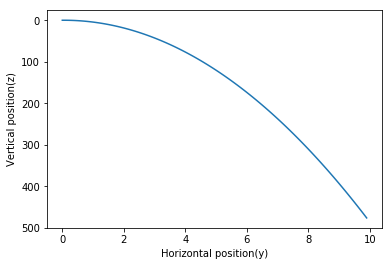

In [7]:
plt.plot(Y_history,Z_history)
plt.gca().invert_yaxis()
plt.xlabel("Horizontal position(y)")
plt.ylabel("Vertical position(z)")
